# Statistiques desccriptives

Ce NoteBook rassemble l'ensemble des statistiques descriptives sur les données de validations dans les stations de RER, sur les données socio démographiques de l'Insee associées au carreau de 1 kilomètre dans lequel se situent les stations de *RER*.

In [34]:
!pip install plotly

In [373]:
import pandas as pd
import geopandas as gpd
from _jointure_validations_stations import df_jointure_validations_stations
import matplotlib.pyplot as plt
from _pre_proces_stations import df_stations
import plotly.express as px
import seaborn as sns
import contextily as ctx
from _pre_proces_stations import df_stations

In [374]:
data=df_jointure_validations_stations()

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [ ]:
data.head()

## Sur la fréquentation des stations de RER
Les données de validations sont obtenues à partir de tous les supports de télé-billetiques : cela signifie que les tickets en carton ne sont pas pris en compte, seuls les pass Navigo sont comptabilisés dans ces données. Voici quelques précisions sur les différentes catégories de titre : 
- **IMAGINE R** : regroupe les forfaits annuels Imagine R Scolaire et Imagine R Etudiant, forfaits réservés aux élèves, apprentis et étudiants qui permet de voyager à volonté toute l’année et dans toute l Ile-de-France.
- **NAVIGO** : regroupe les forfaits Navigo Annuel, Navigo Mois et Navigo Semaine.
- **AMETHYSTE** : comptabilise les forfaits Améthyste : forfait réservé aux personnes âgées ou handicapées sous conditions de ressources ou de statut, et résidant en Île-de-France. Ce forfait
annuel permet à son bénéficiaire de se déplacer de manière illimitée sur tous les modes de transport à l intérieur des zones de validité.
- **TST** : regroupe les forfaits hebdomadaires et mensuels à tarif réduit, accordé aux bénéficiaires
de la Réduction Solidarité Transport, pour voyager à l’intérieur des zones choisies sur tous les
modes de transport en Île-de-France.
- **FGT** : comptabilise les Forfaits Navigo Gratuité Transport, forfait qui permet à certain bénéficiaire d’aides sociales de voyager gratuitement dans toute l’Île-de-France.
- **AUTRE TITRE** : comptabilise les forfaits spéciaux.
- **NON DEFINI** : comptabilise les validations dont le type de titre n’est pas défini (anomalies).

Ensuite, il est important de noter qu'il s'agit de validations uniquement à l'entrée des stations. Il n'est donc pas question ici d'analyser les déplacements, de plutot de voir la fréquentation en "entrée" des stations. Pour restreindre notre analyse avec le temps que l'on a pour réaliser ce projet nous avons décider de nous restreindre uniquement aux stations de *RER*.

### Fréquentation globale du réseau de RER par jour
On commence par aggréger les données par jour pour avoir un appercu de la fréquentation globale du *RER* en Île de France.

In [187]:
freq=data.loc[:,['JOUR', 'nom_long', 'CATEGORIE_TITRE', 'NB_VALD']]
freq_S1 = freq.groupby(['JOUR'])['NB_VALD'].sum().reset_index()
freq_S1.head()

JOUR  NB_VALD
0 2023-01-01   450241
1 2023-01-02  1561604
2 2023-01-03  2135647
3 2023-01-04  2204015
4 2023-01-05  2330751

In [192]:
freq_S1.loc[:,['NB_VALD']].describe()

NB_VALD
count  1.810000e+02
mean   1.817888e+06
std    5.552126e+05
min    4.502410e+05
25%    1.299011e+06
50%    2.096851e+06
75%    2.274070e+06
max    2.520578e+06

La fréquentation de l'ensemble du *RER* au premier semestre 2023 est très différente selon les jours : le jour de fréquentation le plus forte a près de 6 fois plus de validations que le jour avec la fréquentation la plus faible. Par jour, il y a en moyenne 1,8 millions de validation, tandis que plus la moitié des jours ont plus de 2 millions de validation. Cette écart important entre la moyenne et la médiane pourrait être dû aux fortes variations qu'il existe entre la semaine et les weekends sur la fréquentation des *RER*.

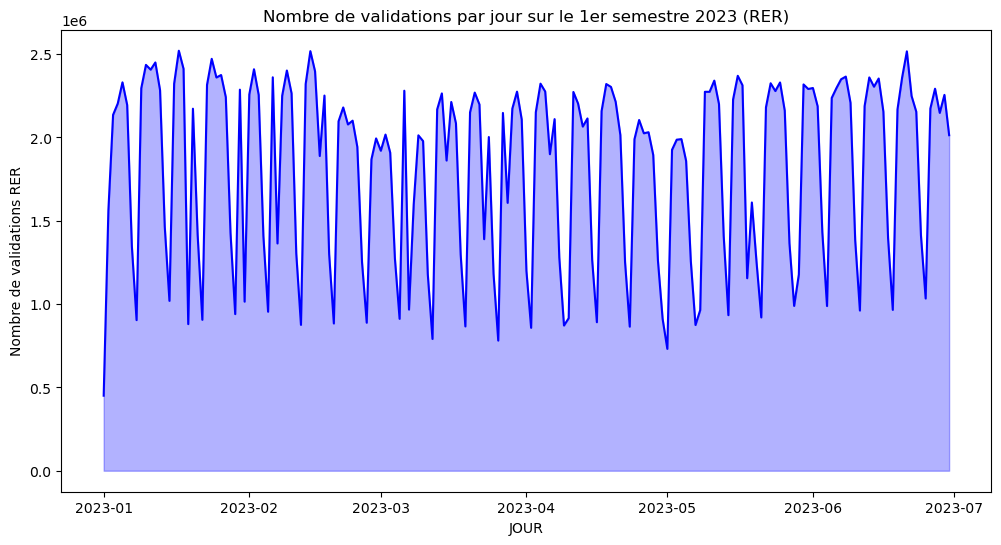

In [203]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='JOUR', y='NB_VALD', data=freq_S1, color = "blue")
l1 = ax.lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
ax.fill_between(x1, y1, color="blue", alpha=0.3)
ax.set_ylabel('Nombre de validations RER')

plt.title('Nombre de validations par jour sur le 1er semestre 2023 (RER)')
plt.show()

La variation en fonction du "type" de jour est très importante comme le fait apparaître ce graphique : l'écart entre la fréquentation en semaine et le weekend est du simple au double/triple.

*Un graphique interactif est disponible ci dessous, accessible sur un NoteBook*.

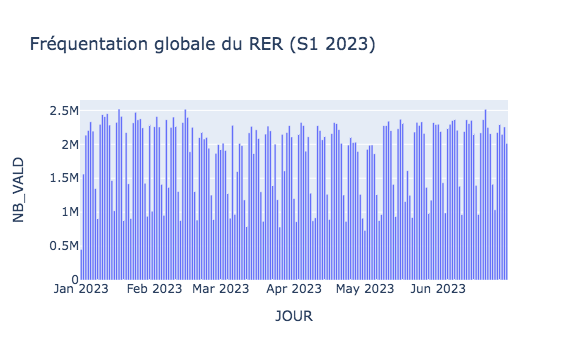

In [204]:
px.bar(freq_S1, x='JOUR', y='NB_VALD',
             title='Fréquentation globale du RER (S1 2023)')

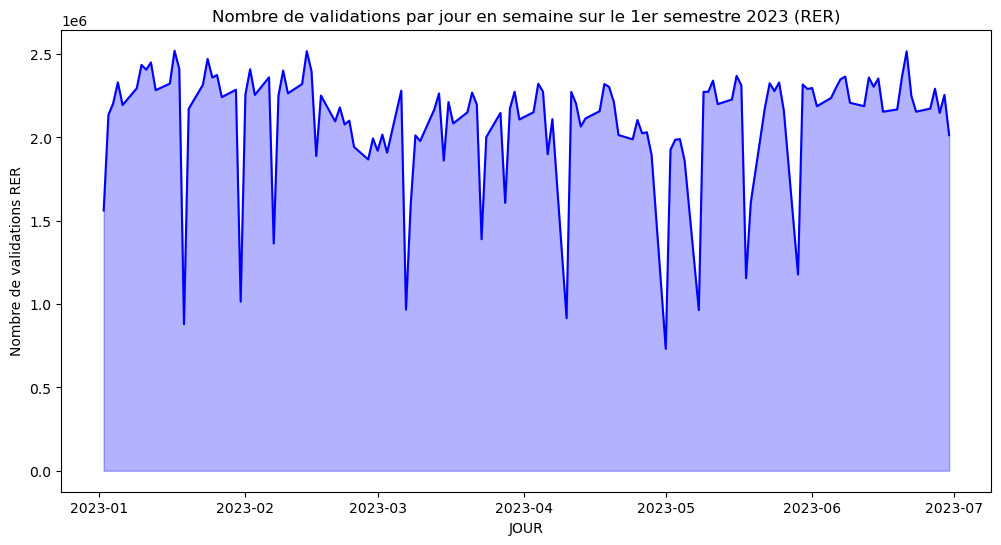

In [214]:
freq_S1['semaine'] = freq_S1['JOUR'].apply(lambda x: 1 if x.weekday() < 5 else 0)

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='JOUR', y='NB_VALD', data=freq_S1[freq_S1['semaine']==1], color = "blue")
l1 = ax.lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
ax.fill_between(x1, y1, color="blue", alpha=0.3)
ax.set_ylabel('Nombre de validations RER')

plt.title('Nombre de validations par jour en semaine sur le 1er semestre 2023 (RER)')
plt.show()

*Un graphique interactif est disponible ci dessous, accessible sur un NoteBook*.

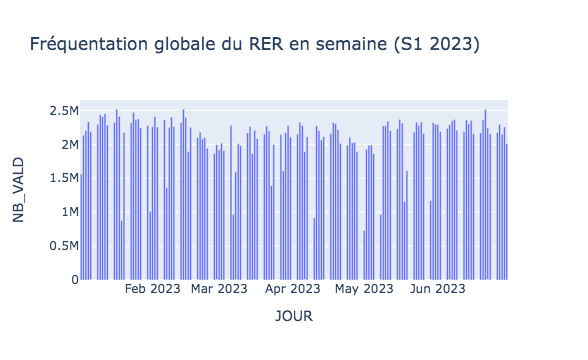

In [226]:
px.bar(freq_S1[freq_S1['semaine']==1], x='JOUR', y='NB_VALD',
             title='Fréquentation globale du RER en semaine (S1 2023)')

In [221]:
freq_S1['NB_VALD'].var()

308261032497.94696

In [222]:
freq_S1[freq_S1['semaine']==1].loc[:,['NB_VALD']].var()

NB_VALD    1.271506e+11
dtype: float64

Lorsque l'on ne regarde que la fréquentation en semaine il reste tout de même beaucoup de variations, même si elle est drastiquement diminuée (variance presque trois fois plus élevée sur l'ensemble de la semaine).

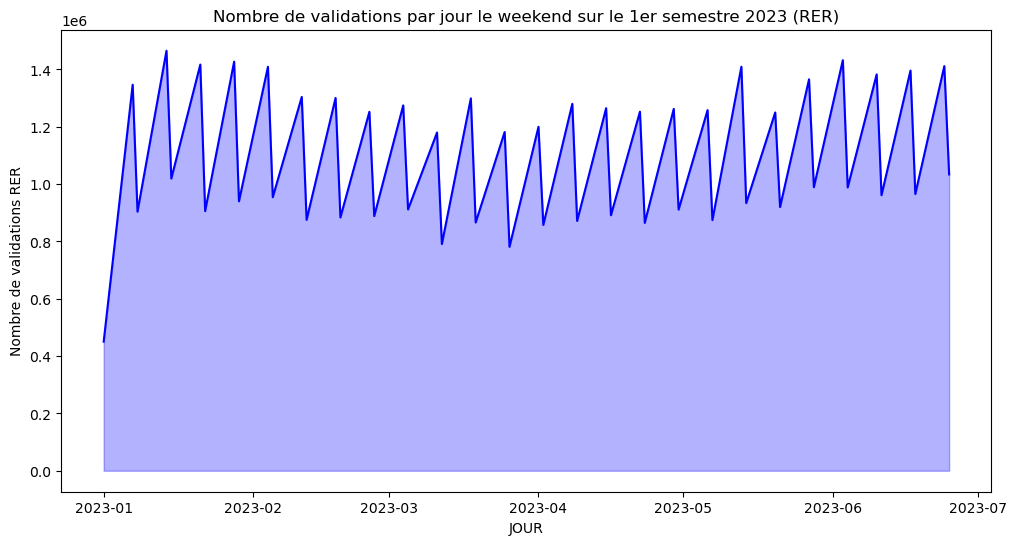

In [225]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='JOUR', y='NB_VALD', data=freq_S1[freq_S1['semaine']==0], color = "blue")
l1 = ax.lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
ax.fill_between(x1, y1, color="blue", alpha=0.3)
ax.set_ylabel('Nombre de validations RER')

plt.title('Nombre de validations par jour le weekend sur le 1er semestre 2023 (RER)')
plt.show()

*Un graphique interactif est disponible ci dessous, accessible sur un NoteBook*.

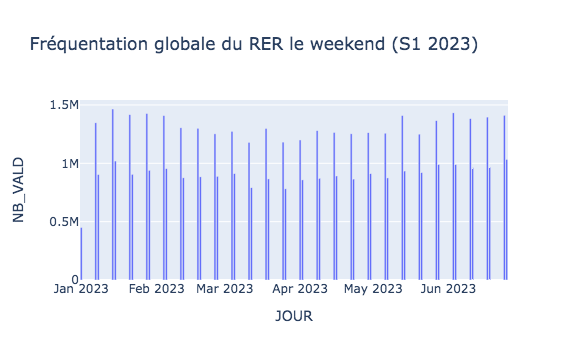

In [227]:
px.bar(freq_S1[freq_S1['semaine']==0], x='JOUR', y='NB_VALD',
             title='Fréquentation globale du RER le weekend (S1 2023)')

Le nombre de validations est beaucoup plus importante le samedi que le dimanche, mais leur part semble beaucoup plus stable au cours du semestre que pour les jours de semaine, traduisant une plus grande réguarité.

Maintenant que nous avons un apercu de la fréquentation globale du *RER* nous pouvons oberserver les différences qu'il existe entre les 5 lignes de *RER*.

### Fréquentation globale par station et par jour
Dans un second temps on s'interresse aux données de fréquentation que l'on aggrège par jour et par station, sur tous les jours du premier semestre 2023 et sur les stations de *RER*.

In [13]:
data.loc[:,['NB_VALD']].describe()

NB_VALD
count  327424.00000
mean     1004.92835
std      3786.49506
min         5.00000
25%        28.00000
50%       143.00000
75%       629.00000
max    128664.00000

Il y a, en moyenne, 1005 validations par jour et par support dans les stations du *RER*, cependant cette moyenne cache de très gros écart. Il y a des stations qui sont extrèmement peu fréquentée : la documentation d'ÎDFM indique que lorsque le nombre de validations est inférieur à 5 mais strictement positif, la donnée est tronquée à 5 pour respecter les exigences de la CNIL.

#### Stations de RER très peu fréquentées

Une information statistique de ce tableau est également très interessante : le Q3 est inférieur à la moyenne : cela signifie que la fréquentation de certaines stations est si grande qu'elle "gonfle" la moyenne. Ces stations sont donc peu nombreuses au vue du nombre de stations totales du *RER* mais pourtant ce sont elles qui canalisent le plus de validation.

Pour identifier les stations avec les plus faibles validations on aggrégèe les données par jour (et donc on enlève les catégories). Il faut bien prendre en compte que le nombre de validations minimales gardé est de 5, et donc que, en aggrégeant par catégorie de pass Navigo on aura mécaniquement plus de validations (l'approximation sera gonflée). Si il n'y a aucune validation dans la journée pour un titre specifique la colonne est soit à 0 soit inexistante.

On considère qu'une station de *RER* est très faiblement fréquentée lorsqu'elle a moins de 100 validations par jour (tous supports confondus). Cela correspond à un peu plus de 5% des enregistrements de la table.

In [240]:
freq_stations = freq.groupby(['JOUR', 'nom_long'])['NB_VALD'].sum().reset_index()
freq_stations.head()

JOUR               nom_long  NB_VALD
0 2023-01-01                  Ablon      336
1 2023-01-01  Achères-Grand-Cormier       23
2 2023-01-01          Achères-Ville      872
3 2023-01-01                 Antony     2237
4 2023-01-01         Arcueil-Cachan     1612

In [241]:
freq_stations['NB_VALD'].quantile(0.05)

64.0

In [242]:
faible_freq=freq_stations[freq_stations['NB_VALD'] <= 100]
faible_freq

JOUR               nom_long  NB_VALD
1     2023-01-01  Achères-Grand-Cormier       23
9     2023-01-01    Avenue Henri Martin       94
14    2023-01-01            Ballancourt       74
16    2023-01-01            Boigneville       17
17    2023-01-01        Boissise-le-Roi       31
...          ...                    ...      ...
41946 2023-06-30          Musée d'Orsay        5
41947 2023-06-30    Nanterre-Préfecture       94
41993 2023-06-30          Saint-Fargeau       20
42010 2023-06-30               Sermaise       10
42036 2023-06-30                 Vosves       42

[2720 rows x 3 columns]

**commenter**

In [243]:
faible_freq_stations=faible_freq.loc[:,['nom_long']]
liste_faible_freq_stations= faible_freq_stations['nom_long'].value_counts()
liste_faible_freq_stations

nom_long
Buno-Gironville          175
Achères-Grand-Cormier    174
Boigneville              173
Vosves                   173
Le Plessis-Chenet        166
                        ... 
Auber                      1
Avenue Foch                1
Parc des Expositions       1
Rosny-sous-Bois            1
Nanterre-Préfecture        1
Name: count, Length: 119, dtype: int64

Sur l'ensemble du premier semestre 2023, plus d'une centaine de stations avaient moins de 100 validations pendant au moins une journée.

Sachant qu'il y avait 181 jours au premier semestre 2023, certaines stations sortent du lot de part leur faible fréquentation : Acères-Grand-Cormier n'a compté plus de 100 validations que 7 jours entre le 1er janvier et le 31 juin 2023.

Afin de poursuivre l'analyse nous regardons sur quelles lignes sont situées les stations les moins fréquentées. On propose d'abord une représentation graphique par ligne, puis ensuite une représentation graphique toutes lignes confondues.

In [247]:
df=liste_faible_freq_stations.reset_index()
df.columns=['Station de RER', 'Nb de jours avec moins de 50 validations']
liste_faible_freq_stations=df.merge(stations, left_on="Station de RER", right_on="nom_long")

In [248]:
couleurs_res_com = {
    'RER A': 'red', 'RER B': 'blue', 'RER C': 'yellow',
    'RER D': 'green', 'RER E': 'pink'}

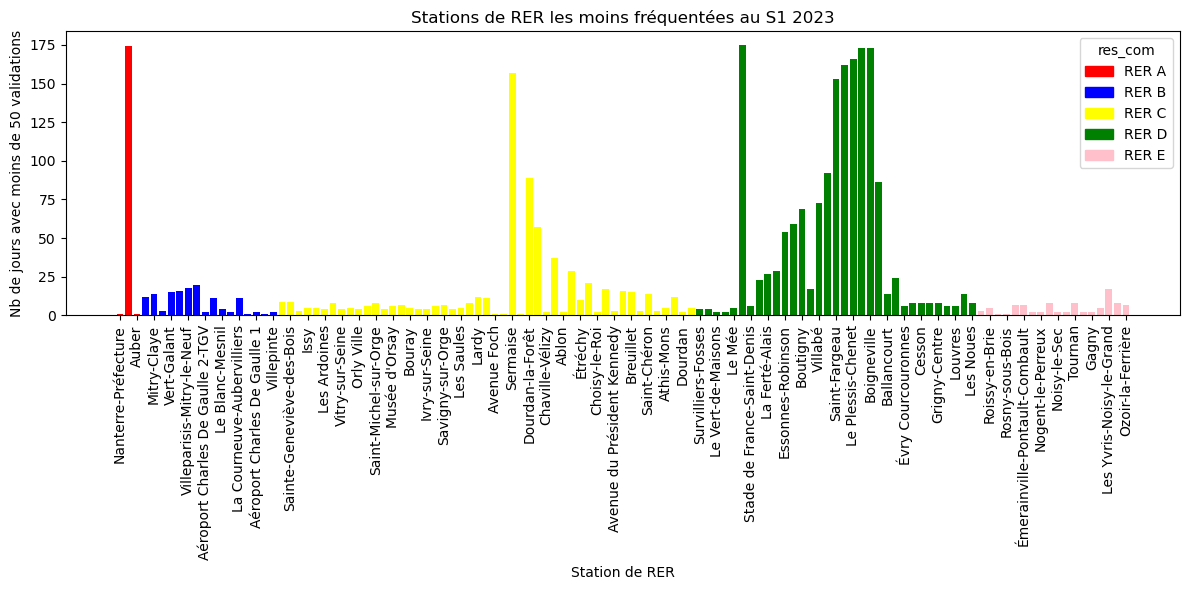

In [266]:
liste_faible_freq_stations2 = liste_faible_freq_stations.sort_values(by='res_com')

# Créez un graphique à barres avec Matplotlib en utilisant la couleur dépendante de res_com
plt.figure(figsize=(12, 6))
x = range(len(liste_faible_freq_stations2))  # Créez une séquence pour l'axe des abscisses
plt.bar(x, liste_faible_freq_stations2['Nb de jours avec moins de 50 validations'],
        color=[couleurs_res_com[res] for res in liste_faible_freq_stations2['res_com']])

# Ajustez les étiquettes de l'axe des abscisses pour n'afficher qu'une station sur trois
n = 2
plt.xticks(x[::n], liste_faible_freq_stations2['Station de RER'][::n], rotation=90)

plt.title('Stations de RER les moins fréquentées au S1 2023')
plt.xlabel('Station de RER')
plt.ylabel('Nb de jours avec moins de 50 validations')

# Créez une légende pour les catégories de res_com
handles = [plt.Rectangle((0, 0), 1, 1, color=couleurs_res_com[res]) for res in couleurs_res_com]
labels = couleurs_res_com.keys()
plt.legend(handles, labels, title='res_com')

# Affichez le graphique
plt.tight_layout()
plt.show()

*Un graphique interactif est disponible ci dessous, accessible sur un NoteBook*.

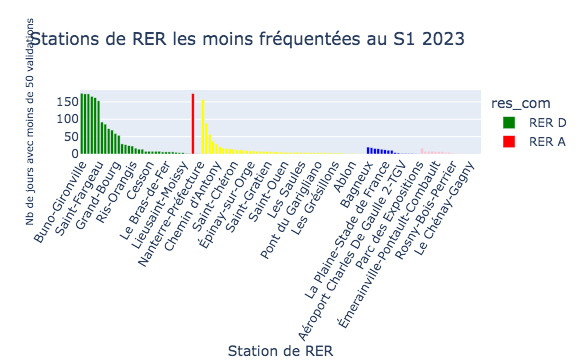

In [265]:
fig = px.bar(liste_faible_freq_stations, x='Station de RER', y='Nb de jours avec moins de 50 validations', color='res_com',
             title='Stations de RER les moins fréquentées au S1 2023',
            color_discrete_map=couleurs_res_com)

# Personnaliser le graphique
fig.update_layout(xaxis_tickangle=-60)  # Incliner les étiquettes de l'axe des abscisses
#fig.update_traces(marker_color='skyblue')  # La couleur par défaut des barres, peut être écrasée par 'color'
fig.update_yaxes(title_font=dict(size=10))  # Réduire la taille de la police pour l'axe des ordonnées

# Afficher le graphique
fig.show()

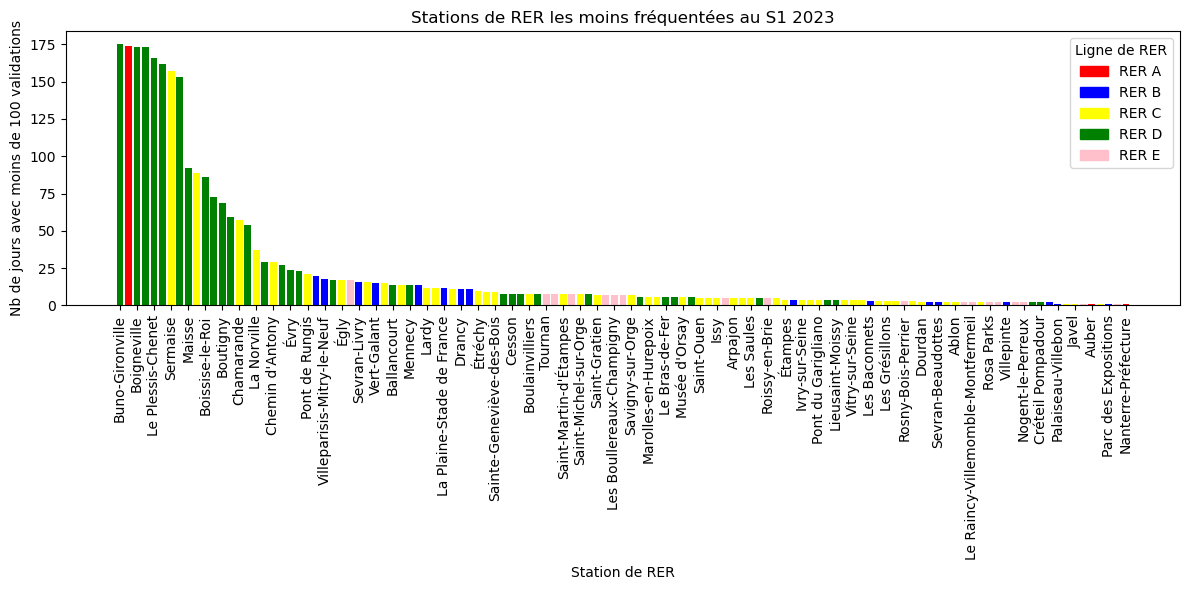

In [264]:
plt.figure(figsize=(12, 6))
x = liste_faible_freq_stations.index  # Utilisez l'indice du DataFrame comme abscisses
plt.bar(x, liste_faible_freq_stations['Nb de jours avec moins de 50 validations'],
        color=[couleurs_res_com[res] for res in liste_faible_freq_stations['res_com']])

# Ajustez les étiquettes de l'axe des abscisses pour n'afficher qu'une station sur trois
n = 2
plt.xticks(x[::n], liste_faible_freq_stations['Station de RER'][::n], rotation=90)

plt.title('Stations de RER les moins fréquentées au S1 2023')
plt.xlabel('Station de RER')
plt.ylabel('Nb de jours avec moins de 100 validations')

# Créez une légende pour les catégories de res_com
handles = [plt.Rectangle((0, 0), 1, 1, color=couleurs_res_com[res]) for res in couleurs_res_com]
labels = couleurs_res_com.keys()
plt.legend(handles, labels, title='Ligne de RER')

# Affichez le graphique
plt.tight_layout()
plt.show()

*Un graphique interactif est disponible ci dessous, accessible sur un NoteBook*.

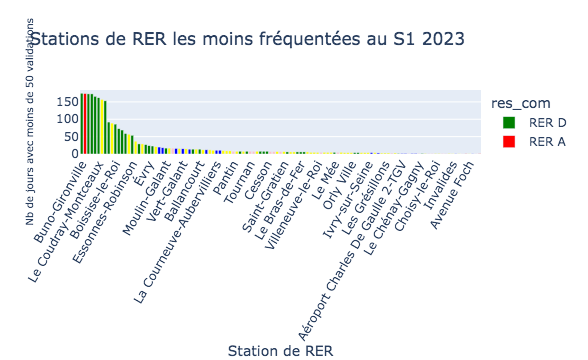

In [269]:
# Créer un graphique en barres interactif avec des couleurs conditionnelles
fig = px.bar(liste_faible_freq_stations, x='Station de RER', y='Nb de jours avec moins de 50 validations', color='res_com',
             title='Stations de RER les moins fréquentées au S1 2023',
             color_discrete_map=couleurs_res_com,
             category_orders={"Station de RER": df_sorted['Station de RER'].tolist()})  # Définir l'ordre des catégories

# Personnaliser le graphique
fig.update_layout(xaxis_tickangle=-60)
fig.update_yaxes(title_font=dict(size=10))

# Afficher le graphique
fig.show()

On observe que le *RER D* est la ligne la plus représentée en termes de faible fréquentation. Cela peut être expliqué par le fait qu'elle est la ligne la plus longue du réseau, et donc que les arrets les plus loin sont relativement peu attractifs. Vérifions cela à l'aide d'une carte qui représente des points proportionnels aux nombres de jours pour lesquels il y avait moins de 100 validations au premier semestre 2023.

In [278]:
from IPython.utils import io
from io import BytesIO
import cartiflette.s3 as s3

with io.capture_output() as captured: #on évite d'afficher les sorties lors de l'importation
    !pip install pandas fiona shapely pyproj rtree
    !pip install geopandas
    !pip install topojson
    !pip install contextily
    !pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
    !pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a


with io.capture_output() as captured: #on évite d'afficher les sorties lors de l'importation
    shp_communes = s3.download_vectorfile_url_all(
        crs = 4326,
        values = ["75", "92", "93", "94", "77", "78", "91", "95"],
        borders="COMMUNE",
        vectorfile_format="topojson",
        filter_by="DEPARTEMENT",
        source="EXPRESS-COG-CARTO-TERRITOIRE",
        year=2022)

with io.capture_output() as captured:
    arrondissements = s3.download_vectorfile_url_all(
        crs = 4326,
        values = ["75"],
        borders="COMMUNE_ARRONDISSEMENT",
        vectorfile_format="topojson",
        filter_by="DEPARTEMENT",
        source="EXPRESS-COG-CARTO-TERRITOIRE",
        year=2022)

shp_communes = pd.concat(
  [shp_communes.loc[shp_communes['INSEE_DEP'] != "75"].to_crs(2154),
    arrondissements.to_crs(2154)])

In [291]:
stations=df_stations()

In [314]:
stations_faibles_freq=stations.merge(liste_faible_freq_stations, how='right')

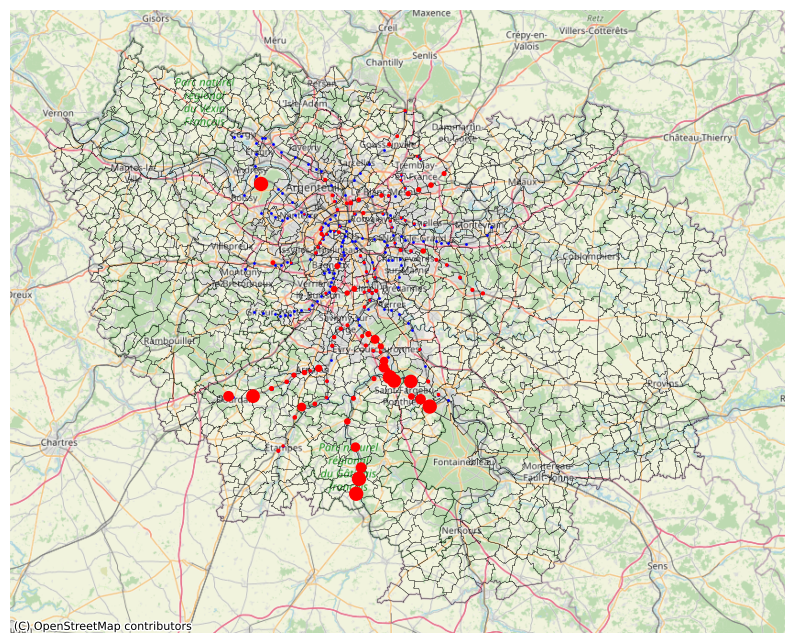

In [318]:
stations_faibles_freq['markersize'] = stations_faibles_freq['Nb de jours avec moins de 50 validations'] * 0.5

fig, ax = plt.subplots(figsize=(10, 10))

shp_communes.to_crs(3857).plot(ax=ax, zorder=1, edgecolor="black",
                               facecolor="none", color=None, linewidth=0.2)

# Tracez les points des stations avec la taille proportionnelle
stations.to_crs(3857).plot(ax=ax, markersize=1, color='blue')
stations_faibles_freq.to_crs(3857).plot(ax=ax, markersize=stations_faibles_freq['markersize'], color='red')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.show()

Cela confirme en partie notre intuition : dans l'ensemble des stations les moins fréquentées, celles qui le sont le moins sont les plus loin de Paris.

Les points bleus correspondent à toutes les stations de *RER*. On observe qu'il y a cependant des stations très éloignées pour lesquelles il y a toujours au moins 100 personnes qui valident tous les jours. Ce n'est pas qu'une question de distance : le croisement avec les données socio-démographiques pourra peut être nous donner plus de précisions par la suite.

#### Stations de RER très fréquentées
On condière qu'une station de *RER* est très fréquentée lorsqu'il y a plus de 10 000 validations par jour (80% quantile).

In [323]:
freq_stations['NB_VALD'].quantile(0.80)

10664.0

In [324]:
haute_freq=freq_stations[freq_stations['NB_VALD'] >= 10000]
haute_freq

JOUR                            nom_long  NB_VALD
45    2023-01-01                 Châtelet-Les Halles    39525
63    2023-01-01                        Gare de Lyon    50846
64    2023-01-01                        Gare du Nord    33867
84    2023-01-01                          La Défense    20992
153   2023-01-01                    Paris Austerlitz    14037
...          ...                                 ...      ...
42021 2023-06-30                Versailles-Chantiers    17100
42025 2023-06-30            Villeneuve-Saint-Georges    13760
42030 2023-06-30  Villiers-le-Bel-Gonesse-Arnouville    12572
42032 2023-06-30                           Vincennes    19256
42045 2023-06-30                  Évry Courcouronnes    12624

[9183 rows x 3 columns]

In [327]:
haute_freq['NB_VALD'].describe()

count      9183.000000
mean      24541.156376
std       27548.823206
min       10000.000000
25%       12511.000000
50%       16264.000000
75%       22357.000000
max      255400.000000
Name: NB_VALD, dtype: float64

Dans les stations les plus fréquentées on observe une très grande hétérogénéité. Identifions ces stations pour mieux comprendre leurs caractéristiques.

In [328]:
haute_freq_stations=haute_freq.loc[:,['nom_long']]
liste_haute_freq_stations= haute_freq_stations['nom_long'].value_counts()
liste_haute_freq_stations

nom_long
Gare du Nord                         181
La Défense                           181
Châtelet-Les Halles                  181
Gare de Lyon                         181
Nation                               180
                                    ... 
Parc des Expositions                   4
Le Raincy-Villemomble-Montfermeil      3
Cergy Le Haut                          2
Savigny-sur-Orge                       2
Bondy                                  1
Name: count, Length: 84, dtype: int64

Il y a donc 84 stations pour lesquelles il y a au moins 1 jour au premier semestre 2023 où il y a plus de 10 000 validations.

On retrouve les très grandes gares parisinnes où il y avait plus de 10 000 validation sur l'ensemble des jours du premier semestre 2023 : Gare du Nord, Châtelet et Gare de Lyon. Le pôle de la Défense fait également partie des stations avec de très hautes fréquentations : son attractivité ne se réduit pas à son bassin d'emploi.

In [329]:
df=liste_haute_freq_stations.reset_index()
df.columns=['Station de RER', 'Nb de jours avec plus de 10000 validations']
liste_haute_freq_stations=df.merge(stations, left_on="Station de RER", right_on="nom_long")

In [330]:
couleurs_res_com = {
    'RER A': 'red', 'RER B': 'blue', 'RER C': 'yellow',
    'RER D': 'green', 'RER E': 'pink', 'RER E, RER A': 'black',
    'RER A, RER B, RER D': 'black', 'RER D, RER A':'black', 
    'RER B, RER D, RER E': 'black', 'RER C, RER D':'black',
    'RER B, RER C':'black', 'RER C, RER B':'black'}

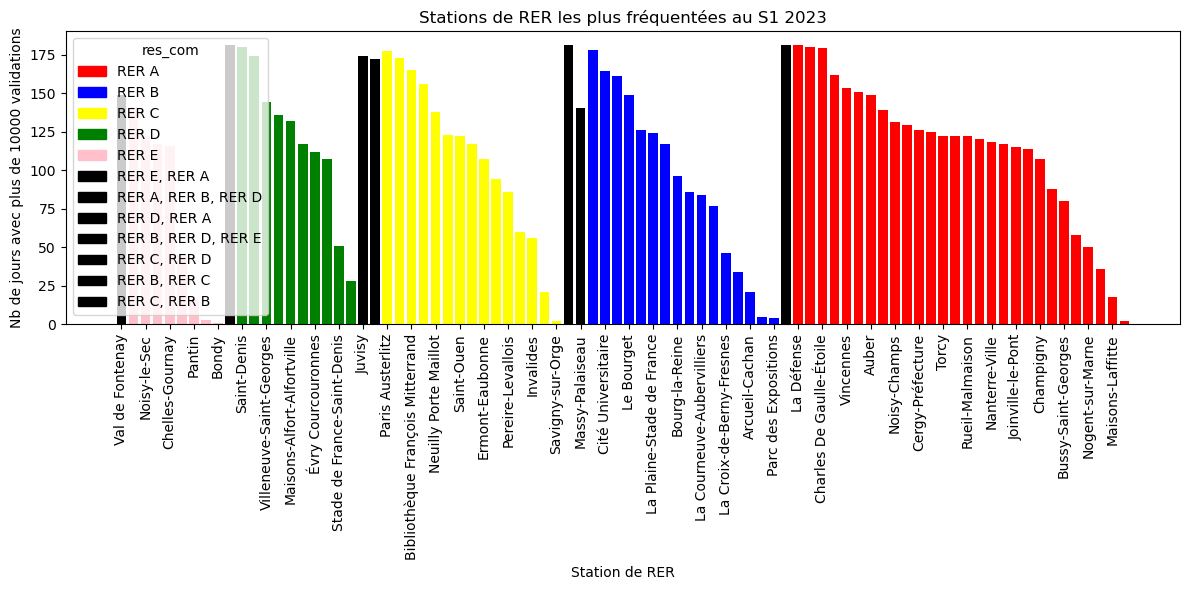

In [340]:
liste_haute_freq_stations2 = liste_haute_freq_stations.sort_values(by=['res_com', 'Nb de jours avec plus de 10000 validations'], ascending=False)

# Créez un graphique à barres avec Matplotlib en utilisant la couleur dépendante de res_com
plt.figure(figsize=(12, 6))
x = range(len(liste_haute_freq_stations2))  # Créez une séquence pour l'axe des abscisses
plt.bar(x, liste_haute_freq_stations2['Nb de jours avec plus de 10000 validations'],
        color=[couleurs_res_com[res] for res in liste_haute_freq_stations2['res_com']])

# Ajustez les étiquettes de l'axe des abscisses pour n'afficher qu'une station sur trois
n = 2
plt.xticks(x[::n], liste_haute_freq_stations2['Station de RER'][::n], rotation=90)

plt.title('Stations de RER les plus fréquentées au S1 2023')
plt.xlabel('Station de RER')
plt.ylabel('Nb de jours avec plus de 10000 validations')

# Créez une légende pour les catégories de res_com
handles = [plt.Rectangle((0, 0), 1, 1, color=couleurs_res_com[res]) for res in couleurs_res_com]
labels = couleurs_res_com.keys()
plt.legend(handles, labels, title='res_com')

# Affichez le graphique
plt.tight_layout()
plt.show()

*Un graphique interactif est disponible ci dessous, accessible sur un NoteBook*.

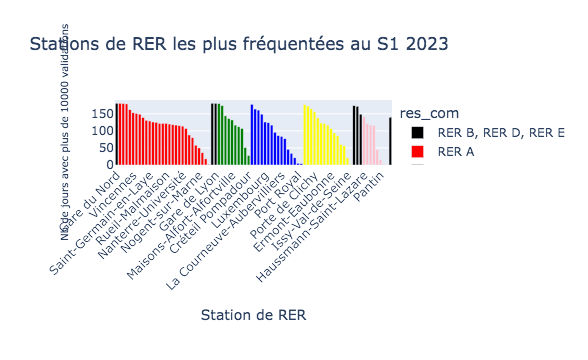

In [332]:
fig = px.bar(liste_haute_freq_stations, x='Station de RER', y='Nb de jours avec plus de 10000 validations', color='res_com',
             title='Stations de RER les plus fréquentées au S1 2023',
            color_discrete_map=couleurs_res_com)

# Personnaliser le graphique
fig.update_layout(xaxis_tickangle=-45)  # Incliner les étiquettes de l'axe des abscisses
#fig.update_traces(marker_color='skyblue')  # La couleur par défaut des barres, peut être écrasée par 'color'
fig.update_yaxes(title_font=dict(size=10))  # Réduire la taille de la police pour l'axe des ordonnées

# Afficher le graphique
fig.show()

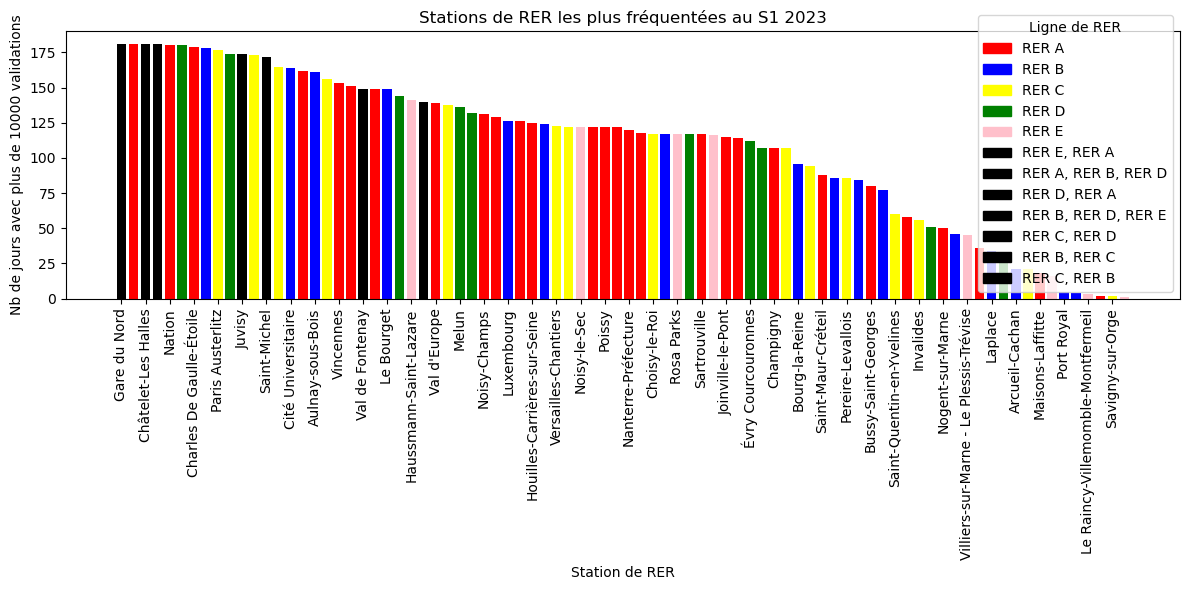

In [341]:
plt.figure(figsize=(12, 6))
x = liste_haute_freq_stations.index  # Utilisez l'indice du DataFrame comme abscisses
plt.bar(x, liste_haute_freq_stations['Nb de jours avec plus de 10000 validations'],
        color=[couleurs_res_com[res] for res in liste_haute_freq_stations['res_com']])

# Ajustez les étiquettes de l'axe des abscisses pour n'afficher qu'une station sur trois
n = 2
plt.xticks(x[::n], liste_haute_freq_stations['Station de RER'][::n], rotation=90)

plt.title('Stations de RER les plus fréquentées au S1 2023')
plt.xlabel('Station de RER')
plt.ylabel('Nb de jours avec plus de 10000 validations')

# Créez une légende pour les catégories de res_com
handles = [plt.Rectangle((0, 0), 1, 1, color=couleurs_res_com[res]) for res in couleurs_res_com]
labels = couleurs_res_com.keys()
plt.legend(handles, labels, title='Ligne de RER')

# Affichez le graphique
plt.tight_layout()
plt.show()

*Un graphique interactif est disponible ci dessous, accessible sur un NoteBook*.

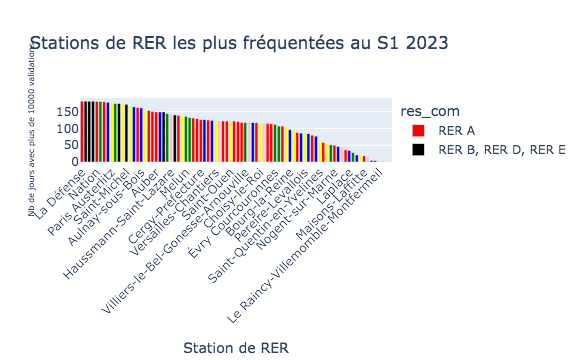

In [335]:
# Trier le DataFrame par 'Nb de jours avec moins de 50 validations' en ordre décroissant
df_sorted = liste_haute_freq_stations.sort_values(by='Nb de jours avec plus de 10000 validations', ascending=False)

# Créer un graphique en barres interactif avec des couleurs conditionnelles
fig = px.bar(df_sorted, x='Station de RER', y='Nb de jours avec plus de 10000 validations', color='res_com',
             title='Stations de RER les plus fréquentées au S1 2023',
             color_discrete_map=couleurs_res_com,
             category_orders={"Station de RER": df_sorted['Station de RER'].tolist()})  # Définir l'ordre des catégories

# Personnaliser le graphique
fig.update_layout(xaxis_tickangle=-45)
fig.update_yaxes(title_font=dict(size=8))

# Afficher le graphique
fig.show()

Ce sont, sans surprise, les stations avec plusieurs *RER* qui cumullent le plus de journées avec plus de 10 000 validations. Ensuite, chaque *RER* possède ses pôles attracteurs (la Défense, Denfert-Rochereau, Austerlitz, Saint-Denis...). Sur le graphique par ligne on voit très bien que les stations du *RER A* sont les plus fréquentées : c'est effectivelent la ligne de train la plus fréquentée d'Europe.

Sur le graphique on voit également assez clairement la "cassure" entre les stations fréquentées tout le temps, et celles très fréquentées partiellement (principalement la semaine).

Ci-dessus, lorsque l'on regarder les stations les plus fréquentées par jour on retrouve Châtelet : cela est logique puisque l'on a cumulé l'ensemble des validations pour toutes les stations de *RER* et de *métro* du pôle. Afin d'avoir une analyse plus fine on prend le maximum de fréquentation par stations et on les classe par ordre décroissant.

In [174]:
haute_freq.sort_values(by="NB_VALD", ascending=False).head(15)

JOUR             nom_long  NB_VALD
39760 2023-06-21  Châtelet-Les Halles   255400
41393 2023-06-28  Châtelet-Les Halles   194301
41626 2023-06-29  Châtelet-Les Halles   192060
3822  2023-01-17           La Défense   191318
3083  2023-01-14  Châtelet-Les Halles   189522
31607 2023-05-17  Châtelet-Les Halles   188804
4703  2023-01-21  Châtelet-Les Halles   188605
35563 2023-06-03  Châtelet-Les Halles   188017
7962  2023-02-04  Châtelet-Les Halles   184162
30678 2023-05-13  Châtelet-Les Halles   183644
2849  2023-01-13  Châtelet-Les Halles   182842
2381  2023-01-11  Châtelet-Les Halles   181099
2187  2023-01-10           La Défense   180650
40227 2023-06-23  Châtelet-Les Halles   179852
6340  2023-01-28  Châtelet-Les Halles   179687

In [185]:
idx = haute_freq.groupby('nom_long')['NB_VALD'].idxmax()

# Utiliser les indices pour récupérer les lignes correspondantes du DataFrame original
result = haute_freq.loc[idx]
result = result.sort_values(by="NB_VALD", ascending=False)

# Afficher le résultat
result.head(15)

JOUR                          nom_long  NB_VALD
39760 2023-06-21               Châtelet-Les Halles   255400
3822  2023-01-17                        La Défense   191318
34647 2023-05-30                      Gare de Lyon   143557
8449  2023-02-06                      Gare du Nord   101716
10397 2023-02-14                  Paris Austerlitz    65066
9682  2023-02-11                            Nation    46739
39899 2023-06-21                      Saint-Michel    46576
5373  2023-01-24  Bibliothèque François Mitterrand    46467
39521 2023-06-20          Charles De Gaulle-Étoile    39902
18205 2023-03-20             Neuilly Porte Maillot    39193
36968 2023-06-09                 Denfert-Rochereau    33584
29089 2023-05-06                            Juvisy    32471
9250  2023-02-09                   Porte de Clichy    31037
39753 2023-06-21                     Champ de Mars    31014
31780 2023-05-17                         Vincennes    30880

Tout d'abord, il est interessant de remarquer qu'un des jours avec le plus grand nombre de validations est le 21 juin, ce qui correspond à la fête de la musique, qui était un mercredi en 2023 : on a donc le cumul de la fréquentation habituelle en plus de celle de cet évènement culturelle.

Sur les 10 stations avec le pic de validation le plus élevé 9 sont situées à Paris. Après la Défense, c'est Juvisy la station de banlieue avec le plus grand nombre de validation (en valeur maximale).

Regardons maintenant si ce constat change lorsque l'on regarde l'on regarde le nombre de validations en cumullé sur le semestre par station.

In [352]:
freq_stations_cum=freq_stations.groupby('nom_long')['NB_VALD'].sum()
freq_stations_cum.sort_values(ascending=False).head(15)

nom_long
Châtelet-Les Halles                 27117087
La Défense                          18802624
Gare de Lyon                        18567245
Gare du Nord                        12886810
Paris Austerlitz                     6810904
Nation                               5925298
Bibliothèque François Mitterrand     5399831
Charles De Gaulle-Étoile             5048362
Saint-Denis                          4042910
Porte de Clichy                      3848362
Juvisy                               3828798
Saint-Michel                         3823602
Noisy-le-Grand-Mont d'Est            3620278
Val de Fontenay                      3575498
Champ de Mars                        3498155
Name: NB_VALD, dtype: int64

Le constat reste essentiellement le même lorsque l'on regarde l'ensemble des validations cumulées sur le premier semestre 2023. Cela montre que les stations qui sont très fréquentées le sont de manière très homogène (elles restent très fréquentées quelque soit le jour).

In [356]:
stations_hautes_freq=stations.merge(freq_stations_cum, how='right', 
                                    right_on="nom_long", left_on='nom_long')

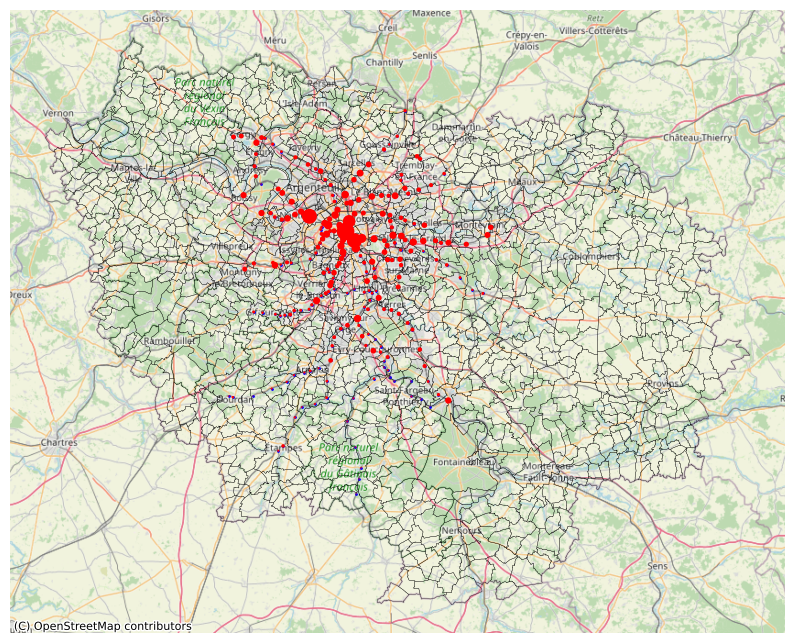

In [361]:
stations_hautes_freq['markersize'] = stations_hautes_freq['NB_VALD'] * 0.000005

fig, ax = plt.subplots(figsize=(10, 10))

shp_communes.to_crs(3857).plot(ax=ax, zorder=1, edgecolor="black",
                               facecolor="none", color=None, linewidth=0.2)

# Tracez les points des stations avec la taille proportionnelle
stations.to_crs(3857).plot(ax=ax, markersize=1, color='blue')
stations_hautes_freq.to_crs(3857).plot(ax=ax, markersize=stations_hautes_freq['markersize'], color='red')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.show()

La carte ci-dessus représente un point rouge de taille proportionnelle aux validations cumulés sur l'ensemble du premier semestre 2023.

On retrouve le constat que nous avions fait avec les stations les moins fréquentées mais de manière plus rafiné : les stations les plus fréquentées sont relativement proches de Paris à l'exception de quelques pôles attracteurs dont on peut penser qu'ils sont denses et très bien déservis.

### Fréquentation par titre de transport

In [364]:
data.head()

AttributeError: 'dict' object has no attribute 'head'

## Sur les carreaux INSEE